<a href="https://colab.research.google.com/github/psiepel/First-steps/blob/main/28122020_reflection_ames_housing_peter_siepel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ames Housing dataset

Following Kaggle's Getting Started Prediction Competition, the goal for this discover project is to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.

The performance metric for your prediction model is the Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally. 



In [ ]:
#Import packages
import pandas as pd
import numpy as np
from pylab import *
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_log_error
from numpy import mean, absolute, std

In [ ]:
#Configuration
URL = 'https://raw.githubusercontent.com/jads-nl/discover-projects/main/ames-housing/AmesHousing.csv'


Exercise 1

Provide a table with descriptive statistics for all included variables and check:

*   Classes of each of the variables (e.g. factors or continuous variables).
*   Descriptive/summary statistics for all continuous variables (e.g. mean, SD, range) and factor variables (e.g. frequencies).
*   Explore missing values.






In [ ]:
#Ingest data
df_housing_data = pd.read_csv("https://raw.githubusercontent.com/jads-nl/discover-projects/main/ames-housing/AmesHousing.csv")
df_housing_data

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,...,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,...,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,...,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,...,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,...,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,...,Y,SBrkr,1003,0,0,1003,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1984.0,Unf,2.0,588.0,TA,TA,Y,120,0,0,0,0,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,301.0,ALQ,324.0,239.0,864.0,...,Y,SBrkr,902,0,0,902,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1983.0,Unf,2.0,484.0,TA,TA,Y,164,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,...,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,

In [ ]:
# Classes of each of the variables 
df_housing_data.info()

# Alternative: df_housing_data.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [ ]:
# Descriptive/summary statistics for all continuous variables (e.g. mean, SD, range) and factor variables (e.g. frequencies).
df_housing_data_summary = df_housing_data.describe()

# Inspect a single variabele: df_housing_data["SalePrice"].describe()

# Add additional classes 
df_housing_data_summary.loc['dtype'] = df_housing_data.dtypes
df_housing_data_summary.loc['#NaN'] = df_housing_data.isna().sum()
df_housing_data_summary

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930,2930,2930,2440,2930,2930,2930,2930,2930,2907,2929,2929,2929,2929,2930,2930,2930,2930,2928,2928,2930,2930,2930,2930,2930,2930,2771,2929,2929,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930
mean,1465.5,7.14464e+08,57.3874,69.2246,10147.9,6.09488,5.56314,1971.36,1984.27,101.897,442.63,49.7224,559.263,1051.61,1159.56,335.456,4.67679,1499.69,0.431352,0.0611339,1.56655,0.379522,2.85427,1.04437,6.443,0.599317,1978.13,1.76681,472.82,93.7519,47.5334,23.0116,2.59249,16.002,2.24334,50.6352,6.21604,2007.79,180796
std,845.962,1.88731e+08,42.638,23.3653,7880.02,1.41103,1.11154,30.2454,20.8603,179.113,455.591,169.168,439.494,440.615,391.891,428.396,46.3105,505.509,0.52482,0.245254,0.552941,0.502629,0.827731,0.214076,1.57296,0.647921,25.5284,0.760566,215.047,126.362,67.4834,64.1391,25.1413,56.0874,35.5972,566.344,2.71449,1.31661,79886.7
min,1,5.26301e+08,20,21,1300,1,1,1872,1950,0,0,0,0,0,334,0,0,334,0,0,0,0,0,0,2,0,1895,0,0,0,0,0,0,0,0,0,1,2006,12789
25%,733.25,5.28477e+08,20,58,7440.25,5,5,1954,1965,0,0,0,219,793,876.25,0,0,1126,0,0,1,0,2,1,5,0,1960,1,320,0,0,0,0,0,0,0,4,2007,129500
50%,1465.5,5.35454e+08,50,68,9436.5,6,5,1973,1993,0,370,0,466,990,1084,0,0,1442,0,0,2,0,3,1,6,1,1979,2,480,0,27,0,0,0,0,0,6,2008,160000
75%,2197.75,9.07181e+08,70,80,11555.2,7,6,2001,2004,164,734,0,802,1302,1384,703.75,0,1742.75,1,0,2,1,3,1,7,1,2002,2,576,168,70,0,0,0,0,0,8,2009,213500
max,2930,1.0071e+09,190,313,215245,10,9,2010,2010,1600,5644,1526,2336,6110,5095,2065,1064,5642,3,2,4,2,8,3,15,4,2207,5,1488,1424,742,1012,508,576,800,17000,12,2010,755000
dtype,int64,int64,int64,float64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,int64,int64,int64,int64,int64,int64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
#NaN,0,0,0,490,0,0,0,0,0,23,1,1,1,1,0,0,0,0,2,2,0,0,0,0,0,0,159,1,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Boxplot inspection of a single variabele
fig = px.box(df_housing_data, y="SalePrice", title='Distribution of sales prices looking at various subgroups')
fig.show()

#Alternative:
#plt.boxplot(df_housing_data["SalePrice"])
#plt.show()

In [ ]:
# Explore missing values (NaN)
df_housing_data.isna().sum()

# Alternatives: 
# df_housing_data.columns[df_housing_data.isnull().any()]
# df_housing_data.loc[:, df_housing_data.isna().any()]
# df_housing_data.isnull().any()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

Exercise 2

There a several missing values in the dataset, which need to be tackled before we can proceed with the rest of the analysis. There are many ways to impute missing values, but for now, impute missing values as follows:

*   Use the median for numeric variables
*   Use the label "100" in all factor variables







In [ ]:
df_housing_data = df_housing_data.fillna(df_housing_data.median())
df_housing_data = df_housing_data.fillna("100")
df_housing_data.isna().sum()

# df_housing_data.info()


Order             0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 82, dtype: int64

Exercise 3

The variable "SalePrice" refers to the price at which a property was sold and hence is the variable of interest for our prediction model ("Y" or dependent variable). Explore Y in terms of:

*   Descriptive/summary statistics (e.g. mean, SDs, range)
*   Visualize the distribution of Y (e.g. matplotlib or seaborn)
*   Visualize the distribution of Y by looking at various subgroups (e.g. create boxplot or scatterplot using matplotlib or seaborn)
*  Look at differences between neigbourhoods
*   Look at differences between housing style
*   Draw a correlation plot to see all correlations between Y and the independent (numeric) variables (Hint: use df.plotting.scatter_matrix or seaborn.pairplot) 

In [ ]:
df_housing_data_summary["SalePrice"]


count       2930
mean      180796
std      79886.7
min        12789
25%       129500
50%       160000
75%       213500
max       755000
dtype      int64
#NaN           0
Name: SalePrice, dtype: object

In [ ]:
fig = px.histogram(df_housing_data, x="SalePrice", title='Distribution of SalePrice')
fig.show()

In [ ]:
fig = px.box(df_housing_data, y="SalePrice", title='Distribution of sales prices looking at various subgroups', points="all")
fig.show()

In [ ]:
fig = px.box(df_housing_data, x="Neighborhood", y="SalePrice", title='SalesPrice differences between neighbourhoods')
fig.show()

In [ ]:
fig = px.box(df_housing_data, x="House Style", y="SalePrice", title='SalesPrice differences between house styles')
fig.show()

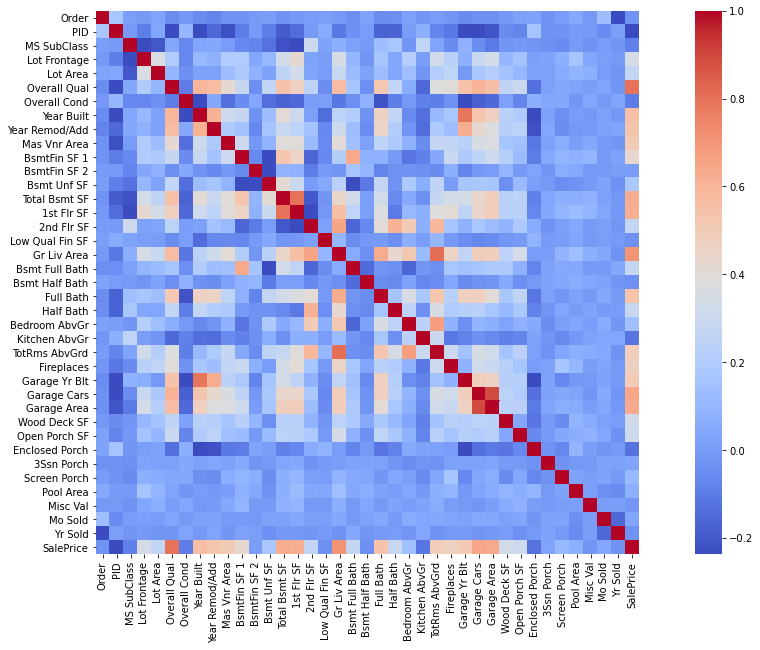

In [ ]:
# Correlation matrix of only nummeric values (object class excluded)
df_housing_data_num = df_housing_data.select_dtypes(exclude=['object'])
fig, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(df_housing_data_num.corr(), cmap='coolwarm', robust=True, square=True);


Exercise 4

*   Estimate a LASSO model and a KNN model
*   Assess which model performs best

In [ ]:
# Data preparation
# Split nummeric values in a training set (70%) and a test set (30%). Exclude SalePrice from training- and test set: this will be our prediction (y)
# Use the log of SalePrice (y) for a more balanced distribution of SalePrice

df_housing_data_train, df_housing_data_test = train_test_split(df_housing_data_num, test_size=0.3)
X = df_housing_data_train.drop(columns = ['SalePrice'])
y = np.log(df_housing_data_train['SalePrice'])
X_test = df_housing_data_test.drop(columns = ['SalePrice'])
y_test = np.log(df_housing_data_test['SalePrice'])

# Check if distribution of SalePrice is more balanced
fig = px.histogram(y, x='SalePrice', title='Distribution of SalePrice')
fig.show()


In [ ]:
# Linear regression. Fit using training set. SalePrice is excluded!
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
print(metrics.mean_absolute_error(y, y_pred))
print(metrics.mean_squared_error(y, y_pred))
print(np.sqrt(metrics.mean_squared_error(y, y_pred)))

0.0941675270815166
0.021772372773410327
0.14755464334750815


In [ ]:
# Linear regression. Validate using test set. SalePrice is excluded!
model = LinearRegression().fit(X_test, y_test)
y_pred = model.predict(X_test)
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.08695078298019934
0.014455337519740472
0.12023035190724708


In [ ]:
# Lasso. Fit using training set. SalePrice is excluded!
model = Lasso(alpha=0.001).fit(X, y)
y_pred = model.predict(X)
print(metrics.mean_absolute_error(y, y_pred))
print(metrics.mean_squared_error(y, y_pred))
print(np.sqrt(metrics.mean_squared_error(y, y_pred)))

0.09431429729978219
0.021792850995217685
0.14762401903219438


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.34865959342633, tolerance: 0.034754097228360085



In [ ]:
# Lasso. Validate using test set. SalePrice is excluded!
model = Lasso(alpha=0.0001).fit(X_test, y_test)
y_pred = model.predict(X_test)
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.08693380277679241
0.01445676313614831
0.12023628044874106


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.320084702848655, tolerance: 0.013869736668854112



In [ ]:
# KNN. Fit using training set. SalePrice is excluded!
model = KNeighborsRegressor(n_neighbors = 5).fit(X,y)
y_pred = model.predict(X)
print(metrics.mean_absolute_error(y, y_pred))
print(metrics.mean_squared_error(y, y_pred))
print(np.sqrt(metrics.mean_squared_error(y, y_pred)))

0.12991238685886755
0.036631045138197836
0.19139238526701588


In [ ]:
# KNN. Validate using test set. SalePrice is excluded!
model = KNeighborsRegressor(n_neighbors = 5).fit(X_test,y_test)
y_pred = model.predict(X_test)
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.14205346344638606
0.03924050491541225
0.1980921626804358
